In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

X is the sample feature, Y is the sample cluster category, 1000 samples, 2 features per sample, 4 clusters, cluster centres in [-1,-1], [0,0], [1,1], [2,2], cluster variances [0.4, 0.2, 0.2, 0.2] respectively

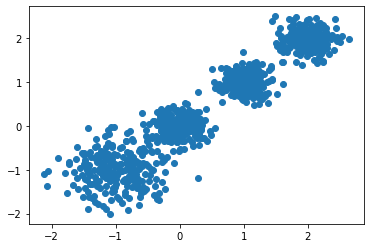

In [32]:
X, y = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=[[-1,-1], [0,0], [1,1], [2,2]], 
                  cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state = 9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

/Users/liuyandong/anaconda3/envs/openAI/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


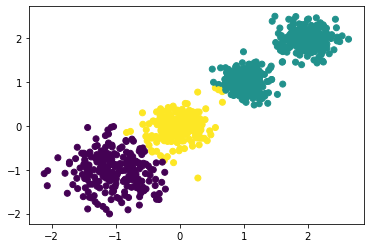

In [35]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**n_clusters=2**
The number of clusters to form as well as the number of centroids to generate.
**random_state=9**
Determines random number generation for centroid initialization
**fit_predict(X)**
Compute k-means clustering.

# K-means step by step.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Distance between two points
def distance(e1, e2):
    return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2)

#  Pick K random points in arr
def Pick_K_random_points(arr,k):
    
    r = np.random.randint(arr.__len__() - 1, size=(k))
    K_random_point= arr[r]  

    return K_random_point

# Get the collection centre
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])

(100, 2)


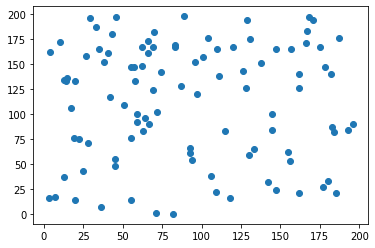

In [39]:
#get the dataset
array_test = np.random.randint(200, size=(100, 1, 2))[:, 0, :]
print(array_test.shape)   
plt.scatter(array_test[:, 0], array_test[:, 1], marker='o')
plt.show()

## Step 1: Pick K random points as cluster

In [40]:
K=4 # Set the number of clusters K
k_Centre=Pick_K_random_points(array_test,K)
print(k_Centre)

[[ 13  37]
 [ 96 152]
 [183  87]
 [ 13  37]]


## Step 2: add new sample to the cluster

In [41]:
# Initialize the clustering array    
cla_arr = [[]]
for i in range(K-1):
    cla_arr.append([]) 
# Iterative clustering
D=np.zeros(K)
D_stop=np.ones(K)
#Determining if the centre point has changed
cla_temp = cla_arr
N=0 #Define an Iterative count N
#Centre no longer changes or iterates to a certain times of iterations
while all(D!=D_stop) and N<20: 
    # Initialize the cla_temp array
    # step 2-1: Clustering each element of the set to the nearest class
    for e in array_test:   
        ki = 0          # Assumes closest to first centre
        min_d = distance(e, k_Centre[ki])
        for j in range(1, k_Centre.__len__()):
            # Find closer clustering centres
            if distance(e, k_Centre[j]) < min_d:    
                min_d = distance(e, k_Centre[j])
                ki = j
        cla_temp[ki].append(e)

    Clustering=cla_temp.copy()
#     print(Clustering)

    # step 2-2: Updating the Clustering Centre
    for k in range(k_Centre.__len__()):
        k_Centre
        new_k_Centre=means(cla_temp[k])
        if all(k_Centre[k] == means(cla_temp[k])):
            D[k]=1.
        else:
            D[k]=0.

        k_Centre[k] = means(cla_temp[k])
        cla_temp[k] = []
    N=N+1
print(k_Centre)

[[ 63  71]
 [ 63 158]
 [160 106]
 [ 34  16]]


/Users/liuyandong/anaconda3/envs/openAI/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/liuyandong/anaconda3/envs/openAI/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/17/vx5r8mxj33s1v7_nrk68fbc40000gn/T/ipykernel_40341/563229795.py:3: RuntimeWarning: overflow encountered in long_scalars
  return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1])**2)


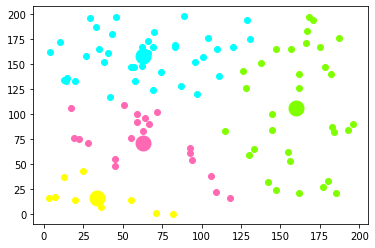

In [42]:
## Visualisation
col = ['HotPink', 'Aqua', 'Chartreuse', 'yellow']
for i in range(K):
    plt.scatter(k_Centre[i][0], k_Centre[i][1], linewidth=10, color=col[i])
    plt.scatter([e[0] for e in Clustering[i]], [e[1] for e in Clustering[i]], color=col[i])
plt.show()


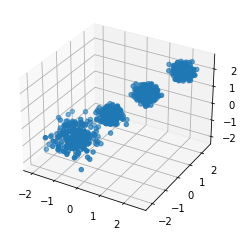

In [46]:
X, y = make_blobs(n_samples=1000, 
                  n_features=3, 
                  centers=[[-1,-1,-1], [0,0,0], [1,1,1], [2,2,2]], 
                  cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state = 9)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')

/Users/liuyandong/anaconda3/envs/openAI/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


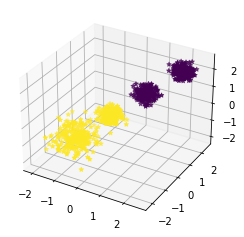

In [51]:
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='*', c=y_pred)